# Homework 3
This notebook contains all code for Homework 3 of DSC 210.
 - Question 3: Power method (20 points)
 - Question 4: Face Recognition with Eigenfaces (30 points + 10 bonus points)

Notes:
* For programming solutions, properly add comments to your code.


---



## Question 3: Power method (20 points)
### **Part (a)**: `power_method(A, x)`
Write function `power_method(A,x)`, which takes as input matrix $A$ and a vector $\mathbf{x}$, and uses the power method to calculate eigenvalues and eigenvectors.

Get the largest **(in absolute value)** eigenvalue and the corresponding eigenvector for matrix A using the above function.
$$A=\begin{bmatrix}
2 & 2 & 1 \\
1 & 3 & 2 \\
2 & 4 & 1
\end{bmatrix} $$

Start with intial eigenvector guesses: `[-1, 0.5, 3]` and `[2,-6,0.2]`. For each of the vectors, iterate until convergence.

**(i)** Plot how the eigenvalue changes w.r.t. iterations.

**(ii)** Report the number of steps it took to converge, for both the eigenvalue and eigenvector.

**(iii)** Report the final eigenvalue and eigenvector. Match your output with the results generated by the numpy API: `numpy.linalg.eig `

Note:
You only need to look at magnitudes of eigenvalues. Use an absolute tolerance of  $10^{-6}$  between eigenvalue output of previous and current iteration as stopping criteria. You may also need to normalize the final eigenvector to match with output of numpy API `numpy.linalg.eig`. (10 points)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 2, 1], [1, 3, 2], [2, 4, 1]])
# !!!! YOUR CODE HERE !!!!
print(A)

def power_method(A, x):

    A = np.array(A, dtype=float)
    x = np.array(x, dtype=float)

    tol=1e-6
    max_iter=1000

    x = x / np.linalg.norm(x)

    eigenvalues_hist = []
    lambda_old = None
    lambda_conv_iter = None
    vec_conv_iter = None

    x_old = x.copy()

    for k in range(max_iter):

        y = A @ x

        x_new = y / np.linalg.norm(y)


        lambda_new = float(x_new @ (A @ x_new))   # Rayleigh quotient as eigenvalue estimate

        eigenvalues_hist.append(lambda_new)


        if k > 0:                                 # Check eigenvector change
            vec_diff = np.linalg.norm(x_new - x)
            if vec_conv_iter is None and vec_diff < tol:
                vec_conv_iter = k                 # iteration index where vector converged

                                                  # Check eigenvalue convergence
        if lambda_old is not None:
            if abs(lambda_new - lambda_old) < tol and lambda_conv_iter is None:
                lambda_conv_iter = k
                x = x_new
                lambda_old = lambda_new
                break


        x = x_new
        lambda_old = lambda_new


    if lambda_conv_iter is None:
        lambda_conv_iter = len(eigenvalues_hist) - 1
    if vec_conv_iter is None:
        vec_conv_iter = lambda_conv_iter  # at least converged by then

    lambda_iters = lambda_conv_iter + 1
    vector_iters = vec_conv_iter + 1

    result = {
        "eigenvalue": lambda_old,
        "eigenvector": x,
        "eigenvalues_hist": eigenvalues_hist,
        "lambda_iters": lambda_iters,
        "vector_iters": vector_iters
    }
    return result


[[2 2 1]
 [1 3 2]
 [2 4 1]]


In [ ]:
x0_1 = np.array([-1, 0.5, 3])  #intial guesses
x0_2 = np.array([2, -6, 0.2])

In [ ]:
result1 = power_method(A, x0_1)
result2 = power_method(A, x0_2)

**(i) — Plot of eigenvalue vs. iteration**

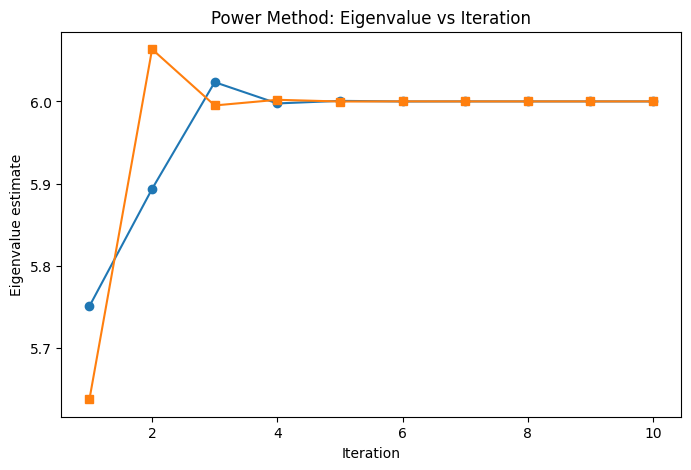

In [ ]:
plt.figure(figsize=(8,5))

iters1 = range(1, len(result1["eigenvalues_hist"]) + 1)
iters2 = range(1, len(result2["eigenvalues_hist"]) + 1)

plt.plot(iters1, result1["eigenvalues_hist"], marker='o', label="x0 = [-1, 0.5, 3]")
plt.plot(iters2, result2["eigenvalues_hist"], marker='s', label="x0 = [2, -6, 0.2]")

plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")
plt.title("Power Method: Eigenvalue vs Iteration")
plt.show()

**(ii) — Number of iterations for convergence**

In [ ]:
print("Results for initial vector x0_1 = [-1, 0.5, 3] : ")
print("Iterations (eigenvalue convergence):", result1["lambda_iters"])
print("Iterations (eigenvector convergence):", result1["vector_iters"])

Results for initial vector x0_1 = [-1, 0.5, 3] : 
Iterations (eigenvalue convergence): 10
Iterations (eigenvector convergence): 10


In [ ]:
print("Results for initial vector x0_2 = [2, -6, 0.2] : ")
print("Iterations (eigenvalue convergence):", result2["lambda_iters"])
print("Iterations (eigenvector convergence):", result2["vector_iters"])

Results for initial vector x0_2 = [2, -6, 0.2] : 
Iterations (eigenvalue convergence): 10
Iterations (eigenvector convergence): 9


**(iii) Final smallest eigenvalue and eigenvector**

In [ ]:
print("Results for initial vector x0_1 = [-1, 0.5, 3] : ")
print("Final eigenvalue  :", result1["eigenvalue"])
print("Final eigenvector \n", result1["eigenvector"])

Results for initial vector x0_1 = [-1, 0.5, 3] : 
Final eigenvalue  : 5.999999947569195
Final eigenvector 
 [0.46156631 0.59344242 0.6593805 ]


In [ ]:
print("Results for initial vector x0_2 = [2, -6, 0.2] : ")
print("Final eigenvalue  :", result2["eigenvalue"])
print("Final eigenvector :\n", result2["eigenvector"])

Results for initial vector x0_2 = [2, -6, 0.2] : 
Final eigenvalue  : 6.000000042372642
Final eigenvector :
 [-0.46156632 -0.59344244 -0.65938047]


In [ ]:
w, V = np.linalg.eig(A)

print("Eigenvalues from numpy.linalg.eig:")
print(w)

print("\nEigenvectors from numpy.linalg.eig (columns):")
print(V)

# Find the dominant eigenvalue
idx_dom = np.argmax(np.abs(w))
lambda_dom = w[idx_dom]
v_dom = V[:, idx_dom]


v_dom_normalized = v_dom / np.linalg.norm(v_dom)

print("\nDominant eigenvalue (numpy):", lambda_dom)
print("Dominant eigenvector (numpy, normalized):\n", v_dom_normalized)

# Compare with power method result
v_power = result1["eigenvector"] / np.linalg.norm(result1["eigenvector"])

print("\nPower method eigenvalue (from x0_1):", result1["eigenvalue"])
print("Power method eigenvector (normalized):\n", v_power)



Eigenvalues from numpy.linalg.eig:
[ 6.  1. -1.]

Eigenvectors from numpy.linalg.eig (columns):
[[ 4.61566331e-01  8.94427191e-01 -5.18104078e-17]
 [ 5.93442426e-01 -4.47213595e-01 -4.47213595e-01]
 [ 6.59380473e-01  4.11783403e-17  8.94427191e-01]]

Dominant eigenvalue (numpy): 6.000000000000002
Dominant eigenvector (numpy, normalized):
 [0.46156633 0.59344243 0.65938047]

Power method eigenvalue (from x0_1): 5.999999947569195
Power method eigenvector (normalized):
 [0.46156631 0.59344242 0.6593805 ]




---



### **Part (b)**: `inverse_power_method(A, x)`
Write function `inverse_power_method(A,x)`, which takes as input matrix $A$ and a vector $\mathbf{x}$, and uses inverse power method to calculate the smallest (in absolute value) eigenvalue and corresponding eigenvector. Solve for the smallest (in absolute value) eigenvalue and corresponding eigenvector for the matrix from (a). Use the same intial eigenvector guesses as (a).

**(i)** Plot the computed/estimated eigenvalue with respect to iterations.

**(ii)** Report how many iterations do you need for it to converge to the smallest eigenvalue.

**(iii)** Report the final eigenvalue and eigenvector you get. Match your answer with the results generated by the **numpy** API `numpy.linalg.eig`.

Note: You only need to look at magnitudes of eigenvalues. Use an absolute tolerance of $10^{-6}$ between eigenvalue output of previous and current iteration as stopping criteria. You may also need to normalize the final eigenvector to match with output of numpy API `numpy.linalg.eig`. (10 points)

In [ ]:
# !!!! YOUR CODE HERE !!!!
def inverse_power_method(A, x):
    A = np.array(A, dtype=float)
    x = np.array(x, dtype=float)

    tol = 1e-6
    max_iter = 1000

    x = x / np.linalg.norm(x)  # normalize initial vector

    eigenvalues_hist = []
    lambda_old = None
    lambda_conv_iter = None
    vec_conv_iter = None

    for k in range(max_iter):
        # Solve A y = x
        y = np.linalg.solve(A, x)

        # Normalize y to get next x
        x_new = y / np.linalg.norm(y)

        # Rayleigh quotient for current eigenvalue estimate
        lambda_new = float(x_new @ (A @ x_new))
        eigenvalues_hist.append(lambda_new)

        # Check eigenvector convergence
        if k > 0:
            vec_diff = np.linalg.norm(x_new - x)
            if vec_conv_iter is None and vec_diff < tol:
                vec_conv_iter = k

        # Check eigenvalue convergence
        if lambda_old is not None and abs(lambda_new - lambda_old) < tol and lambda_conv_iter is None:
            lambda_conv_iter = k
            x = x_new
            lambda_old = lambda_new
            break

        x = x_new
        lambda_old = lambda_new

    if lambda_conv_iter is None:
        lambda_conv_iter = len(eigenvalues_hist) - 1
    if vec_conv_iter is None:
        vec_conv_iter = lambda_conv_iter

    lambda_iters = lambda_conv_iter + 1
    vector_iters = vec_conv_iter + 1

    result = {
        "eigenvalue": lambda_old,
        "eigenvector": x,
        "eigenvalues_hist": eigenvalues_hist,
        "lambda_iters": lambda_iters,
        "vector_iters": vector_iters
    }
    return result


In [ ]:
x0_1 = np.array([1, 0.5, 3])  #intial guesses
x0_2 = np.array([2, -0.6, 0.2])

In [ ]:
inv_result1 = inverse_power_method(A, x0_1)
inv_result2 = inverse_power_method(A, x0_2)

**i) Plot of eigenvalue vs. iteration**


Results for starting vector x1:
Iterations for eigenvalue convergence: 10
Iterations for eigenvector convergence: 10
Smallest eigenvalue (approx.): -0.9999999536931167
Corresponding normalized eigenvector: [ 9.41321216e-09 -4.47213580e-01  8.94427199e-01]

Results for starting vector x2:
Iterations for eigenvalue convergence: 1000
Iterations for eigenvector convergence: 1000
Smallest eigenvalue (approx.): 1.0147601476014763
Corresponding normalized eigenvector: [ 0.90202724 -0.42953678 -0.04295368]


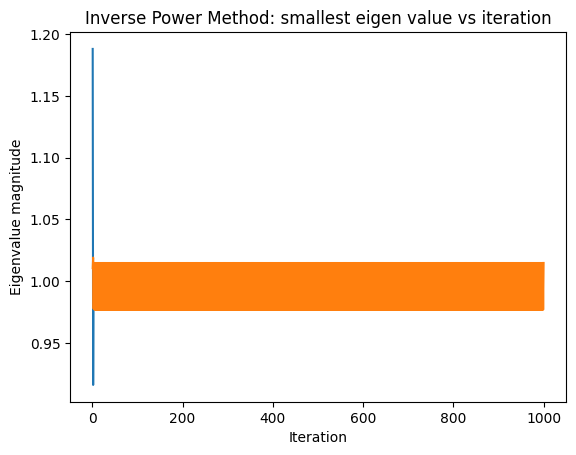


NumPy smallest eigenvalue: 0.9999999999999991
NumPy corresponding eigenvector: [ 8.94427191e-01 -4.47213595e-01  4.11783403e-17]


In [ ]:
for idx, res in enumerate([inv_result1, inv_result2], start=1):
    print(f"\nResults for starting vector x{idx}:")
    print("Iterations for eigenvalue convergence:", res['lambda_iters'])
    print("Iterations for eigenvector convergence:", res['vector_iters'])
    print("Smallest eigenvalue (approx.):", res['eigenvalue'])
    print("Corresponding normalized eigenvector:", res['eigenvector'])

    # Plot eigenvalue convergence
    plt.plot(range(1, len(res['eigenvalues_hist'])+1), np.abs(res['eigenvalues_hist']), label=f'x{idx}')

plt.xlabel("Iteration")
plt.ylabel("Eigenvalue magnitude")
plt.title("Inverse Power Method: smallest eigen value vs iteration")
plt.show()

# Compare with NumPy for verification
eigvals_np, eigvecs_np = np.linalg.eig(A)
min_index = np.argmin(np.abs(eigvals_np))
print("\nNumPy smallest eigenvalue:", eigvals_np[min_index])
print("NumPy corresponding eigenvector:", eigvecs_np[:, min_index])


**ii) Number of iterations for convergence**

In [ ]:
print("Inverse Power Method: initial vector x0_1 = [-1, 0.5, 3] ")
print("Iterations (eigenvalue convergence):", inv_result1["lambda_iters"])
print("Iterations (eigenvector convergence):", inv_result1["vector_iters"])

Inverse Power Method: initial vector x0_1 = [-1, 0.5, 3] 
Iterations (eigenvalue convergence): 10
Iterations (eigenvector convergence): 10


In [ ]:
print("Inverse Power Method: initial vector x0_2 = [2, -6, 0.2] ")
print("Iterations (eigenvalue convergence):", inv_result2["lambda_iters"])
print("Iterations (eigenvector convergence):", inv_result2["vector_iters"])

Inverse Power Method: initial vector x0_2 = [2, -6, 0.2] 
Iterations (eigenvalue convergence): 1000
Iterations (eigenvector convergence): 1000


**(iii) Final smallest eigenvalue and eigenvector**

In [ ]:
print("Inverse Power Method: initial vector x0_1 = [-1, 0.5, 3] ")
print("Final eigenvalue :", inv_result1["eigenvalue"])
print("Final eigenvector :\n", inv_result1["eigenvector"])

Inverse Power Method: initial vector x0_1 = [-1, 0.5, 3] 
Final eigenvalue : -0.9999999536931167
Final eigenvector :
 [ 9.41321216e-09 -4.47213580e-01  8.94427199e-01]


In [ ]:
print("Inverse Power Method: initial vector x0_2 = [2, -6, 0.2] ")
print("Final eigenvalue  :", inv_result2["eigenvalue"])
print("Final eigenvector  :\n", inv_result2["eigenvector"])

Inverse Power Method: initial vector x0_2 = [2, -6, 0.2] 
Final eigenvalue  : 1.0147601476014763
Final eigenvector  :
 [ 0.90202724 -0.42953678 -0.04295368]


In [ ]:
w, V = np.linalg.eig(A)

print("Eigenvalues from numpy.linalg.eig:")
print(w)

print("\nEigenvectors from numpy.linalg.eig (columns):")
print(V)


idx_min = np.argmin(np.abs(w))
lambda_min = w[idx_min]
v_min = V[:, idx_min]


v_min_normalized = v_min / np.linalg.norm(v_min)

print("\nSmallest |lambda| from numpy:", lambda_min)
print("Corresponding eigenvector (numpy, normalized):\n", v_min_normalized)

# Compare with inverse power method result
v_inv = inv_result1["eigenvector"]
v_inv_normalized = v_inv / np.linalg.norm(v_inv)

print("\nInverse power method eigenvalue (from x0_1):", inv_result1["eigenvalue"])
print("Inverse power method eigenvector (normalized):\n", v_inv_normalized)




Eigenvalues from numpy.linalg.eig:
[ 6.  1. -1.]

Eigenvectors from numpy.linalg.eig (columns):
[[ 4.61566331e-01  8.94427191e-01 -5.18104078e-17]
 [ 5.93442426e-01 -4.47213595e-01 -4.47213595e-01]
 [ 6.59380473e-01  4.11783403e-17  8.94427191e-01]]

Smallest |lambda| from numpy: 0.9999999999999991
Corresponding eigenvector (numpy, normalized):
 [ 8.94427191e-01 -4.47213595e-01  4.11783403e-17]

Inverse power method eigenvalue (from x0_1): -0.9999999536931167
Inverse power method eigenvector (normalized):
 [ 9.41321216e-09 -4.47213580e-01  8.94427199e-01]




---



## Question 4: Face Recognition with Eigenfaces (30 points + 10 bonus points)

**Goal**: Perform face recognition on the *Labeled Faces in the Wild* dataset using PyTorch.

**Dataset Information**: [*Labeled Faces in the Wild*](http://vis-www.cs.umass.edu/lfw/) dataset consists of face photographs designed for studying the problem of unconstrained face recognition. The original dataset contains more than 13,000 images of faces collected from the web.


**Tasks**:
* First, perform Principal Component Analysis (PCA) on the image dataset.
* Using PCA, extract the Top $k$ principal components (*eigenvalues*).
* Reconstruction of faces from these *eigenvalues* will give us the *eigen-faces* which are the most representative features of most of the images in the dataset.
* **BONUS**: Finally, train a simple PyTorch Neural Network model on the modified image dataset. This trained model will be used for prediction and evaluation on a test set.

**Note:**
* Run all the cells in order.
* **Do not edit** the cells marked with `!!DO NOT EDIT!!`
* Only **add your code** to cells marked with `!!!! YOUR CODE HERE !!!!`
* Do not change variable names, and use the names which are suggested.



---



In [ ]:
# !!DO NOT EDIT!!
# loading the dataset directly from the scikit-learn library (can take about 3-5 mins)
import numpy as np
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=80)

# each 2D image is of size 62 x 47 pixels, represented by a 2D array.
# the value of each pixel is a real value from 0 to 255.
count, height, width = dataset.images.shape
print('The dataset type is:',type(dataset.images))
print('The number of images in the dataset:',count)
print('The height of each image:',height)
print('The width of each image:',width)

# sklearn also gives us a flattened version of the images which is a vector of size 62 x 47 = 2914.
# we can directly use that for our exercise
print('The shape of data is:',dataset.data.shape)

The dataset type is: <class 'numpy.ndarray'>
The number of images in the dataset: 1140
The height of each image: 62
The width of each image: 47
The shape of data is: (1140, 2914)


For optimum performance, we have only considered people who have more than 80 images. This restriction notably reduces the size of the dataset.\
Now let us look at the labels of the people present in the dataset

In [ ]:
# !!DO NOT EDIT!!
# create target label - target name pairs
targets = [(x,y) for x,y in zip(range(len(np.unique(dataset.target))), dataset.target_names)]
print('The target labels and names are:\n', targets)

The target labels and names are:
 [(0, np.str_('Colin Powell')), (1, np.str_('Donald Rumsfeld')), (2, np.str_('George W Bush')), (3, np.str_('Gerhard Schroeder')), (4, np.str_('Tony Blair'))]




---



### **(a) Preprocessing:**
Using the `train_test_split` API from `sklearn`, split the data into train and test dataset in the ratio 3:1. Use `random_state=42`.

For better performance, normalize the features which can have different ranges with huge values. (As all our features here are in the range [0,255],  it is not explicitly needed here. However, it is a good exercise.)

Use the `StandardScaler` class from sklearn and use that to normalize `X_train` and `X_test`. Validate and show your result by printing the first 5 features of 5 images of `X_train` (This result can vary from pc to pc). (10 points)

In [ ]:
# !!DO NOT EDIT!!
X = dataset.data
y = dataset.target

In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/4, random_state=42   #1/4 3/4 =1:3
)
# output variable names -  X_train, X_test, y_train, y_test
#######

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("First 5 features of 5 samples in X_train:\n")
print(X_train[:5, :5])

Shape of X_train: (855, 2914)
First 5 features of 5 samples in X_train:

[[-1.0548956  -1.1314403  -1.1468822  -0.85341436 -0.7309732 ]
 [ 2.6098442   2.4664047   1.6027023   0.7667316   0.23976761]
 [-1.0626272  -1.0687327  -1.1071484  -1.1075549   1.3457758 ]
 [-0.1735025  -0.2221809  -0.7018628  -1.3775792  -1.3436539 ]
 [ 0.05844303  0.00513394 -0.03433381 -0.20217922 -0.0466805 ]]




---



### **(b) Dimensionality reduction** :
Use the `PCA` API from `sklearn` to extract the top 100 principal components of the image matrix and fit it on the training dataset.

Visualize some of the top few components as an image (eigenfaces). (10 points)

In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
# initialize PCA API from sklearn with n_components. Also set svd_solver="randomized" and whiten=True in the initialization parameters.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
n_components=100
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True, random_state=42)
# output variable name -  pca
#######

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print("Original X_train shape:", X_train.shape)
print("Reduced X_train_pca shape:", X_train_pca.shape)

Original X_train shape: (855, 2914)
Reduced X_train_pca shape: (855, 100)


In [ ]:
eigenfaces = pca.components_.reshape((100, height, width))

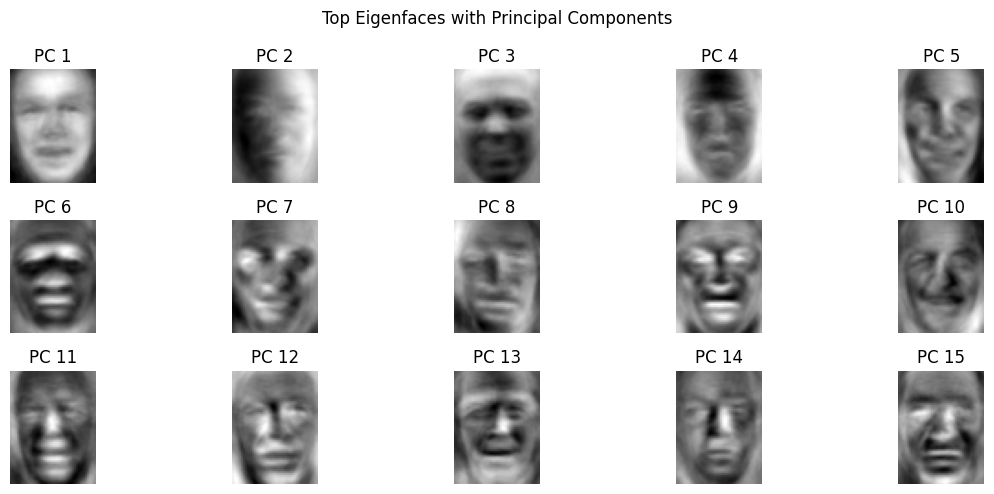

In [ ]:
n_eigenfaces_to_show = 15  # show top 15
fig, axes = plt.subplots(3, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat[:n_eigenfaces_to_show]):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Eigenfaces with Principal Components")
plt.tight_layout()
plt.show()

Now we will plot the most representative eigenfaces:

In [ ]:
# !!DO NOT EDIT!!
# Helper function to plot
import matplotlib.pyplot as plt
def plot_gallery(images, titles, height, width, n_row=2, n_col=4):
    plt.figure(figsize=(2* n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

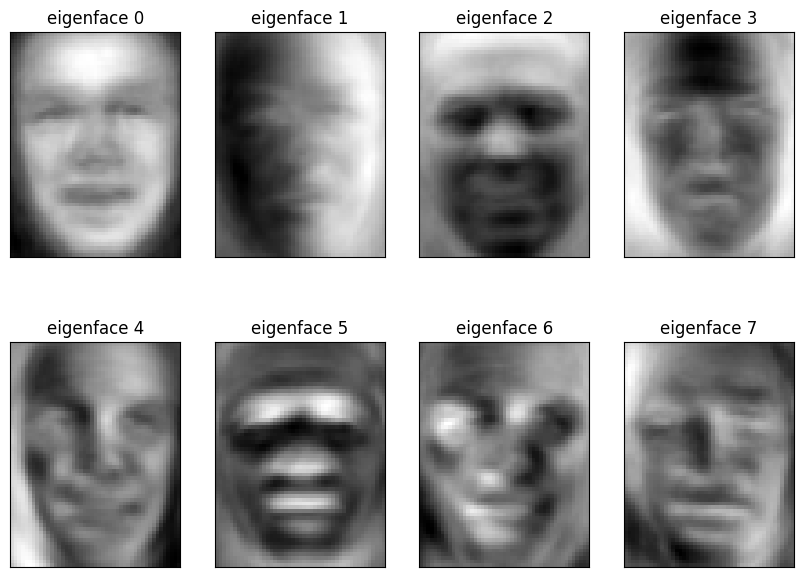

In [ ]:
# !!DO NOT EDIT!!
# get the 100 eigen faces and reshape them to original image size which is 62 x 47 pixels
eigenfaces = pca.components_.reshape((n_components, height, width))

# plot the top 8 eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, height, width)

plt.show()



---



### **(c) Face reconstruction:**
Reconstruct an image from its point projected on the principal component basis.

Project the first three faces on the eigenvector basis using PCA models trained with varying number of principal components. Using the projected points, reconstruct the faces, and visualize  the images.

Your final output should be a $(3\times 5)$ image matrix, where the rows are the data points, and the columns correspond to original image and reconstructed image for n_components $=[10,100,150,500]$. (10 points)

In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
num_faces = 3
n_components = [10, 100, 150, 500]   # number of principal components to try

#######

In [ ]:
X_test_original_scale = scaler.inverse_transform(X_test)

In [ ]:
pca_models = {}
for n in n_components:
    pca_n = PCA(n_components=n, svd_solver='randomized', whiten=True, random_state=42)
    pca_n.fit(X_train)  # fit on standardized training data
    pca_models[n] = pca_n

In [ ]:
images = []
titles = []

In [ ]:
for i in range(num_faces):
    orig_face = X_test_original_scale[i].reshape(height, width)
    images.append(orig_face)
    titles.append("original")

    for n in n_components:
        pca_n = pca_models[n]

        z = pca_n.transform(X_test[i].reshape(1, -1))
        x_rec_scaled = pca_n.inverse_transform(z)
        x_rec = scaler.inverse_transform(x_rec_scaled)

        images.append(x_rec.reshape(height, width))
        titles.append(f"n={n}")

images = np.array(images)



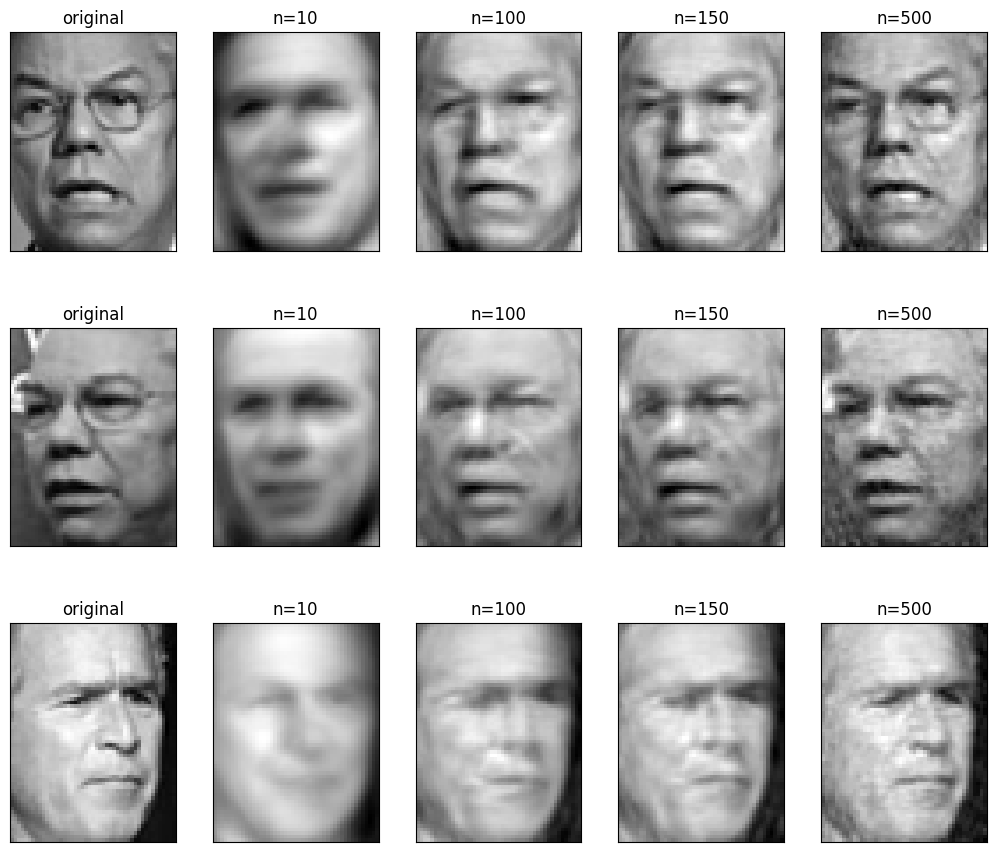

In [ ]:
plot_gallery(images, titles, height, width, n_row=3, n_col=5)
plt.show()



---



### **(d) Prediction (Bonus):**
Train a neural network classifier in **PyTorch** on the transformed dataset. Complete each of the steps below.

Note: For PyTorch reference see [documentation](https://pytorch.org/docs/stable/index.html). (10 points)

In [ ]:
# !!DO NOT EDIT!!
# define imports here
import torch
import torch.nn as nn

Before training, we need to transform the training and test dataset to reduced forms (100 dimensions) using the `pca` function defined in (b).

Move the train and test dataset to torch tensors in order to work with pytorch.

In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
# 1. project X_train and X_test on orthonormal basis using the PCA API initialized in part (b).
n_components = 100
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)
if X_train_pca.shape[1] > n_components:
    X_train_pca = X_train_pca[:, :n_components]
if X_test_pca.shape[1] > n_components:
    X_test_pca = X_test_pca[:, :n_components]

# 2. now convert X_train_pca, X_test_pca, y_train and y_test to torch.tensor. For y_train and y_test, set dtype=torch.long
y_train_arr = getattr(y_train, "values", np.asarray(y_train))
y_test_arr  = getattr(y_test,  "values", np.asarray(y_test))

X_train_pca_torch = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_pca_torch  = torch.tensor(X_test_pca, dtype=torch.float32)
y_train_torch     = torch.tensor(y_train_arr, dtype=torch.long)
y_test_torch      = torch.tensor(y_test_arr, dtype=torch.long)

print("X_train_pca_torch:", X_train_pca_torch.shape, X_train_pca_torch.dtype)
print("X_test_pca_torch: ", X_test_pca_torch.shape,  X_test_pca_torch.dtype)
print("y_train_torch:    ", y_train_torch.shape,     y_train_torch.dtype)
print("y_test_torch:     ", y_test_torch.shape,      y_test_torch.dtype)

# output variable names -  X_train_pca_torch, X_test_pca_torch, y_train_torch, y_test_torch
#######

X_train_pca_torch: torch.Size([855, 100]) torch.float32
X_test_pca_torch:  torch.Size([285, 100]) torch.float32
y_train_torch:     torch.Size([855]) torch.int64
y_test_torch:      torch.Size([285]) torch.int64


In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
# 3. We will implement a simple multilayer perceptron (MLP) in pytorch with one hidden layer.
# Using this neural network model, we will train on the transformed dataset.
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # Initalize various layers of MLP as instructed below
    # DO: initialze two linear layers: 100 -> 1024  and 1024-> 5
    self.fc1 = nn.Linear(100, 1024)
    self.fc2 = nn.Linear(1024, 5)


    # DO: initialize relu activation function
    self.relu = nn.ReLU()
    # DO: initialize LogSoftmax
    self.logsoftmax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    # DO: define the feedforward algorithm of the model and return the final output
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    out = self.logsoftmax(x)
    return out

#######

In [ ]:
#######
# !!!! YOUR CODE HERE !!!!
# 4. create an instance of the MLP class here
model = MLP()

# 5. define loss (use negative log likelihood loss: torch.nn.NLLLoss)
criterion = torch.nn.NLLLoss()

# 6. define optimizer (use torch.optim.SGD (Stochastic Gradient Descent)).
# Set learning rate to 1e-1 and also set model parameters
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

#######

# !!DO NOT EDIT!!
# 7. train the classifier on the PCA-transformed training data for 500 epochs
# This part is already implemented.
# Go through each step carefully and understand what it does.
for epoch in range(501):
  # reset gradients
  optimizer.zero_grad()

  # predict
  output=model(X_train_pca_torch)

  # calculate loss
  loss=criterion(output, y_train_torch)

  # backpropagate loss
  loss.backward()

  # performs a single gradient update step
  optimizer.step()

  if epoch%50==0:
    print('Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))

Epoch: 0, Loss: 1.612
Epoch: 50, Loss: 0.440
Epoch: 100, Loss: 0.222
Epoch: 150, Loss: 0.134
Epoch: 200, Loss: 0.090
Epoch: 250, Loss: 0.065
Epoch: 300, Loss: 0.049
Epoch: 350, Loss: 0.039
Epoch: 400, Loss: 0.032
Epoch: 450, Loss: 0.027
Epoch: 500, Loss: 0.023


In [ ]:
# !!DO NOT EDIT!!
# predict on test data
predictions = model(X_test_pca_torch) # gives softmax logits
y_pred = torch.argmax(predictions, dim=1).numpy() # get the labels from prdictions: nx5 -> nx1

                   precision    recall  f1-score   support

     Colin Powell       0.95      0.86      0.90        64
  Donald Rumsfeld       0.79      0.72      0.75        32
    George W Bush       0.91      0.95      0.93       127
Gerhard Schroeder       0.86      0.86      0.86        29
       Tony Blair       0.81      0.88      0.84        33

         accuracy                           0.89       285
        macro avg       0.86      0.85      0.86       285
     weighted avg       0.89      0.89      0.89       285



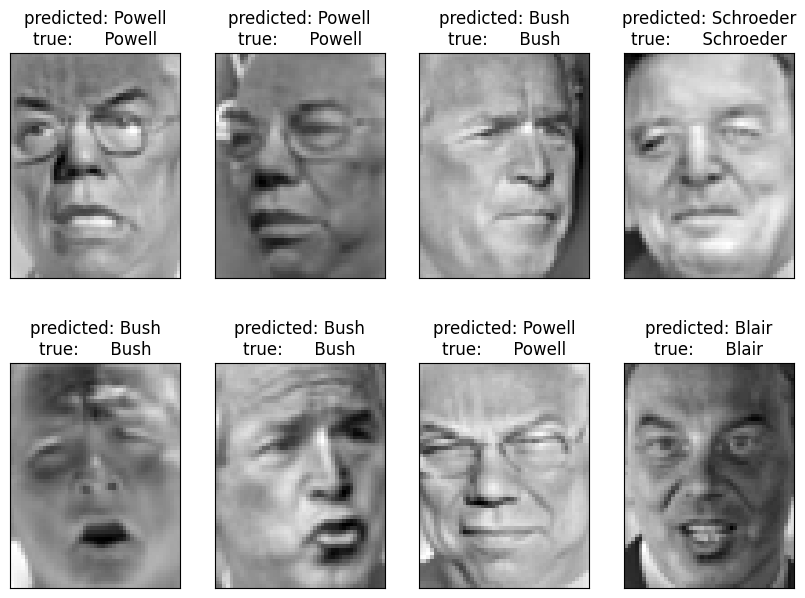

In [ ]:
# !!DO NOT EDIT!!
# here, we will print the multi-label classification report: precision, recall, f1-score etc.
from sklearn.metrics import classification_report
target_names=[y for x,y in targets]
print(classification_report(y_test, y_pred, target_names=target_names))

# let us validate some of the predictions by plotting images
# display some of the results
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, height, width)



---

